In [21]:
import pandas as pd
import seaborn as sns

In [22]:
df = pd.read_csv('titanic.csv')


In [23]:
df['Age'].isnull().sum()

177

## Handling of Normaly distributed attribute-Gaussion distribution

C:\Users\hanitha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

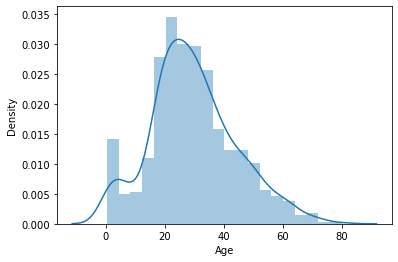

In [24]:
sns.distplot(df['Age'].dropna())

Text(0, 0.5, 'no of passenger')

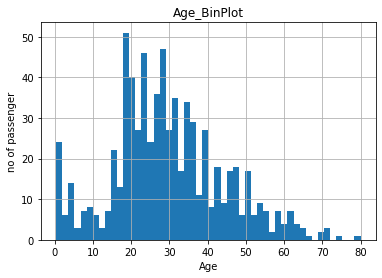

In [25]:
figure = df.Age.hist(bins=50)
figure.set_title('Age_BinPlot')
figure.set_xlabel('Age')
figure.set_ylabel('no of passenger')


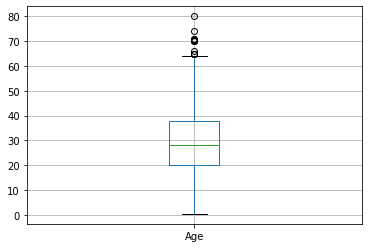

In [26]:
fig = df.boxplot(column='Age')

In [27]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers
uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

In [29]:
cntMorethan73 = df.loc[df['Age']>=73]

In [32]:
cntMorethan73.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [33]:
df.loc[df['Age']>=73,'Age']=73

In [34]:
cntMorethan73_1 = df.loc[df['Age']>=73]

In [35]:
cntMorethan73_1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,73.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,73.0,0,0,347060,7.775,NaN,S


## Handling of non-Normaly distributed attribute

Text(0, 0.5, 'No of passengers')

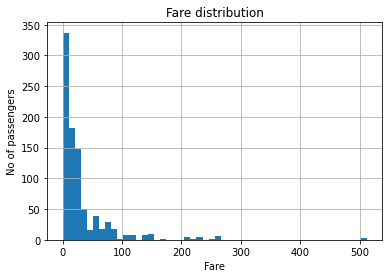

In [39]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

<AxesSubplot:>

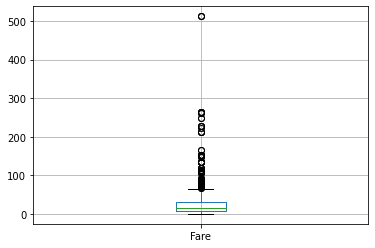

In [40]:
df.boxplot(column='Fare')

In [41]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [46]:
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print('IQR: ', IQR), print("\nlower_bridge:",lower_bridge), print('\nupper_bridge:',upper_bridge)

IQR:  23.0896

lower_bridge: -26.724

upper_bridge: 65.6344


(None, None, None)

In [47]:
## Extreme outliers":

lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print('Extreme Outliers:'), print("\nlower_bridge:",lower_bridge), print('\nupper_bridge:',upper_bridge)

Extreme Outliers:

lower_bridge: -61.358399999999996

upper_bridge: 100.2688


(None, None, None)

In [48]:
fareExtreme = df.loc[df['Fare']>=100]

In [53]:
fareExtreme.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C


In [54]:
fareExtreme.shape

(53, 12)

In [55]:
df.loc[df['Fare']>=100,'Fare']=100

In [56]:
fare100 = df.loc[df['Fare']==100]

In [60]:
fare100.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,100.0,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,100.0,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,100.0,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,100.0,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,100.0,B80,C


In [62]:
fare100.shape

(53, 12)

<AxesSubplot:>

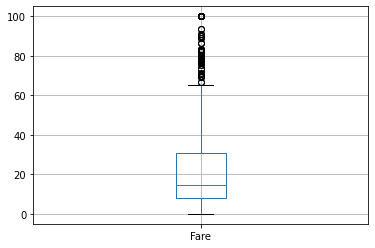

In [66]:
df.boxplot(column='Fare')

Text(0, 0.5, 'No of passengers')

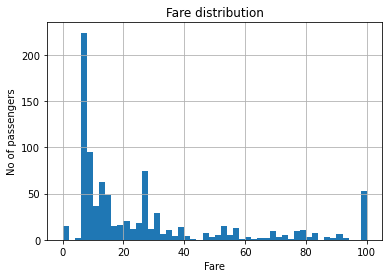

In [65]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare distribution')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

C:\Users\hanitha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

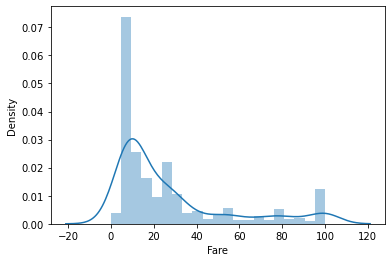

In [67]:
sns.distplot(df['Fare'])